### This notebook runs XGBoost on GESIS vs GBS.

In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

df = pd.read_csv('../input/preprocessed1.csv')

x = df[df.columns[:-1]]
y = df['Umfrage']

ModuleNotFoundError: No module named 'xgboost'

In [47]:
conf = len(y)*[0]

for j in range(5):
    
    clf = xgb.XGBClassifier(n_estimators=100+10*j, learning_rate= j*0.1)
    y_pred = cross_val_predict(clf,x,y,cv=10)
        
    mat = confusion_matrix(y,y_pred)
    print(mat)
    print(str(int(mat[1][0] * 566/3800))+' statt '+str(mat[0][0]))
    print('----------------------')
    
    for i in range(len(y)):
        if(y_pred[i]=='GBS'):
            conf[i] = conf[i] + 1

0.7744274809160305

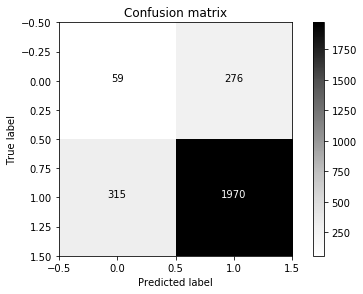

In [48]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes= df.columns[:-1],
                      title='Confusion matrix')

plt.savefig('ConfusionMatrix1')
plt.show()